In [1]:
import numpy as np
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import pynbody.plot as pp
import pickle
import pandas as pd
import pynbody.plot.sph as sph

In [2]:
from Time import *
from Load import *
from Load import *

In [3]:
def cumulative_sfh(halo_num):
    age = 13.800797497330507
    s = pynbody.load('/home/christenc/Data/Sims/h229.cosmo50PLK.3072g/h229.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
    halo = s.halos()[halo_num]
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=80)
        plt.clf()
    except ValueError:
        print('Cannot create SFH, only {len(halo.s)} star particles')
        raise
        
    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar 
    return sfh, bincenters

# H229

In [4]:
datat2['z0haloid']
#datat2['mstar']

0         2.0
1         5.0
2         7.0
3        17.0
4        20.0
5        22.0
6        23.0
7        27.0
8        29.0
9        33.0
10       52.0
11       53.0
12       55.0
13       59.0
14       61.0
15       62.0
16       73.0
17      104.0
18      113.0
19      139.0
20      212.0
21      290.0
22        2.0
23        5.0
24        7.0
25       17.0
26       20.0
27       22.0
28       23.0
29       27.0
        ...  
1226     20.0
1227     22.0
1228     23.0
1229     27.0
1230     29.0
1231     33.0
1232     52.0
1233     53.0
1234     61.0
1235     62.0
1236     73.0
1237    104.0
1238    139.0
1239      2.0
1240      5.0
1241     20.0
1242     22.0
1243     29.0
1244     33.0
1245     52.0
1246     61.0
1247     62.0
1248     73.0
1249     20.0
1250     22.0
1251     29.0
1252     33.0
1253     52.0
1254     61.0
1255    212.0
Name: z0haloid, Length: 1256, dtype: float64

In [68]:
# from scipy.interpolate import interp1d
# plt.figure(figsize=(7,5))
# fig, ax1 = plt.subplots()
# ax1.set_xlabel('Gyr')
# ax1.set_ylabel('Distance', color='black')
# f = interp1d(datat1['time'][datat1['z0haloid']==i], datat1['h1dist'][datat1['z0haloid']==i])
# xnew = datat1['time'][datat1['z0haloid']==i]

# ax1.plot(xnew, f(xnew), c='black')
# ax1.tick_params(axis='y', labelcolor='black')
# ax1.semilogy()
# x = datat1['time'][datat1['z0haloid']==i]
# y = [1]*43
# plt.plot(x,y)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.set_ylabel('Flow Rates', color='b')  # we already handled the x-label with ax1
# ax2.plot(datat1['time'][datat1['z0haloid']==i], abs(datat1['inflow_91'][datat1['z0haloid']==i]), c='blue', label=r'M${in}$')
# ax2.plot(datat1['time'][datat1['z0haloid']==i], datat1['outflow_91'][datat1['z0haloid']==i], c='red', label=r'M${out}$')
# ax2.tick_params(axis='y', labelcolor='b')

# plt.figure()
# x = xnew
# f = f(xnew)
# g = y

# plt.plot(x, f, '-')
# plt.plot(x, g, '-')

# intersections = [(x[i], f[i]) for i,_ in enumerate(zip(f,g)) if f[i] == g[i]]

# plt.show()

Halo 2


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

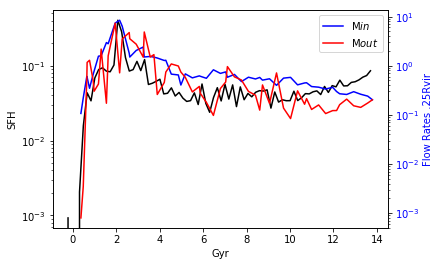

<Figure size 504x360 with 0 Axes>

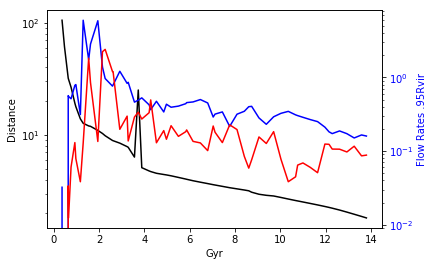

<Figure size 504x360 with 0 Axes>

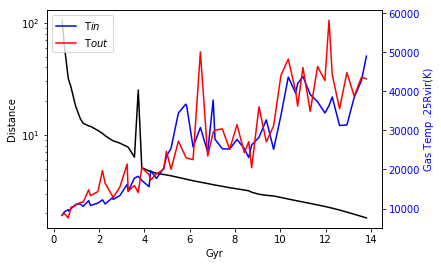

<Figure size 504x360 with 0 Axes>

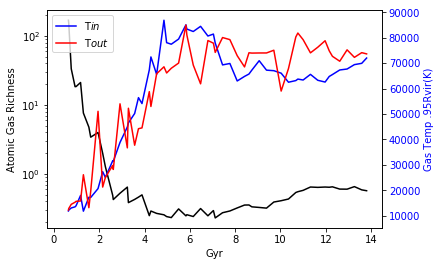

In [5]:
i = 2
print("Halo 2")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

Halo 5


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

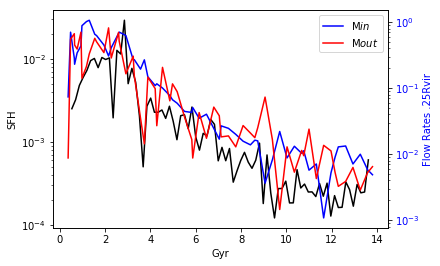

<Figure size 504x360 with 0 Axes>

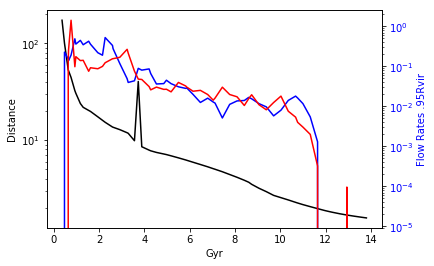

<Figure size 504x360 with 0 Axes>

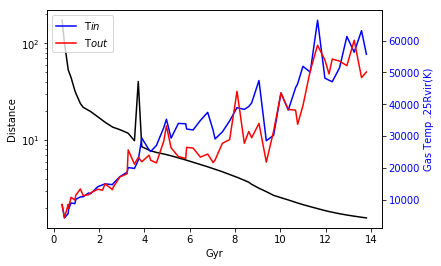

<Figure size 504x360 with 0 Axes>

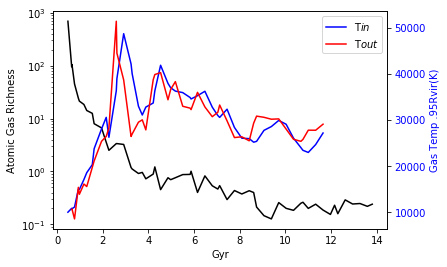

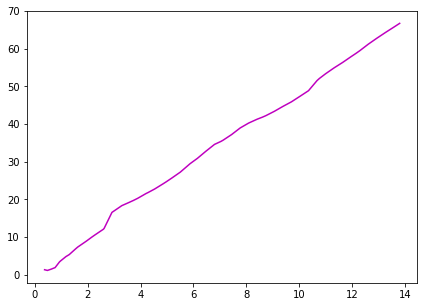

In [8]:
i = 5
print("Halo 5")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 7


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

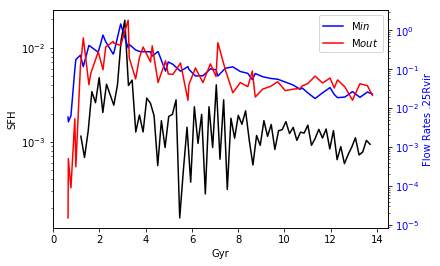

<Figure size 504x360 with 0 Axes>

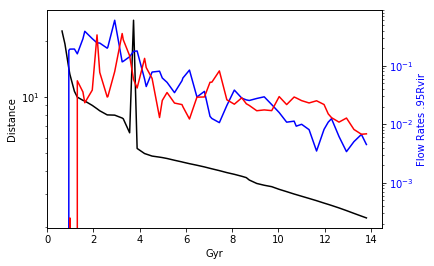

<Figure size 504x360 with 0 Axes>

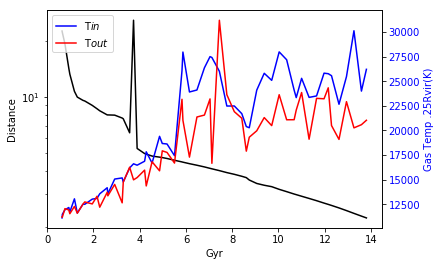

<Figure size 504x360 with 0 Axes>

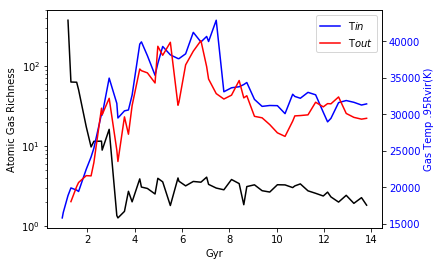

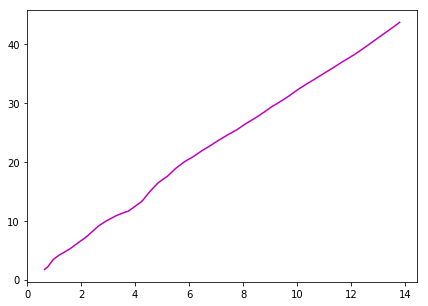

In [9]:
i = 7
print("Halo 7")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
plt.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
plt.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 17


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

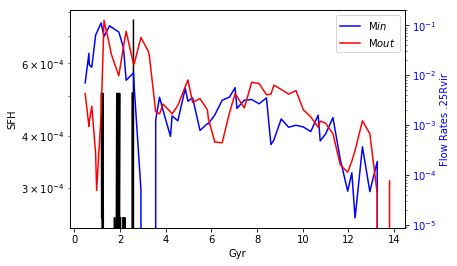

<Figure size 504x360 with 0 Axes>

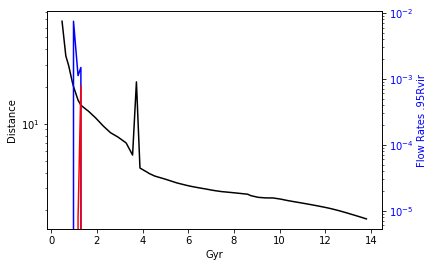

<Figure size 504x360 with 0 Axes>

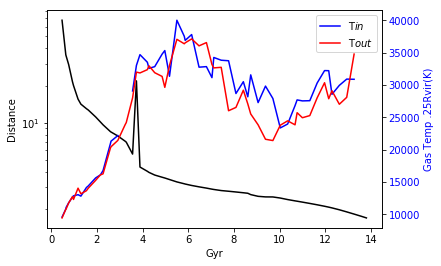

<Figure size 504x360 with 0 Axes>

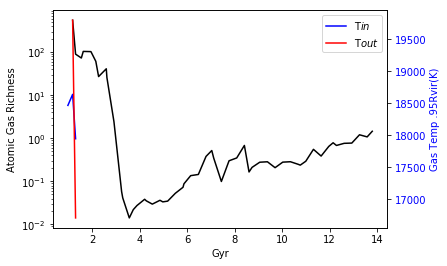

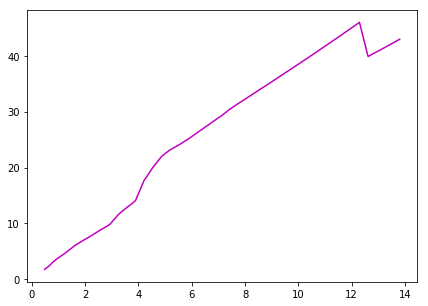

In [10]:
i = 17
print("Halo 17")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 20


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

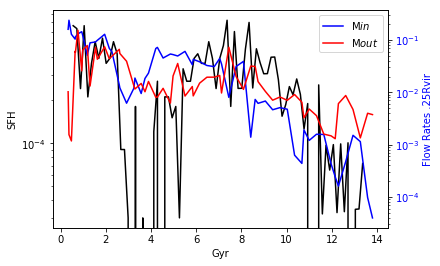

<Figure size 504x360 with 0 Axes>

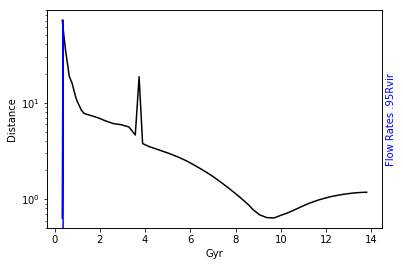

<Figure size 504x360 with 0 Axes>

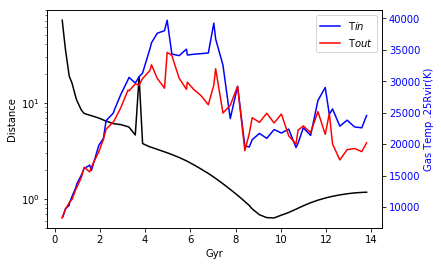

<Figure size 504x360 with 0 Axes>

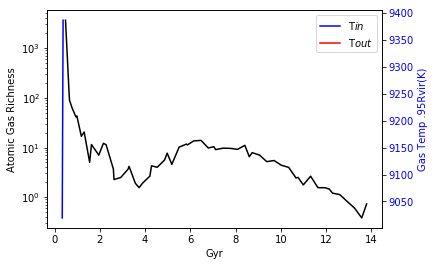

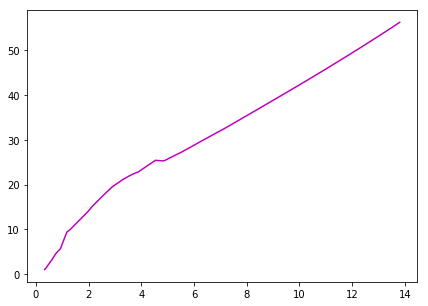

In [11]:
i = 20
print("Halo 20")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 22


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

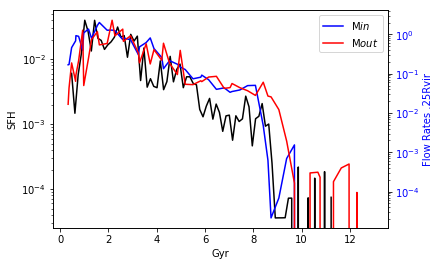

<Figure size 504x360 with 0 Axes>

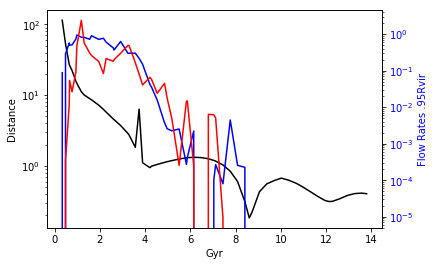

<Figure size 504x360 with 0 Axes>

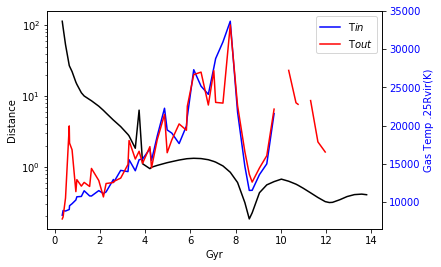

<Figure size 504x360 with 0 Axes>

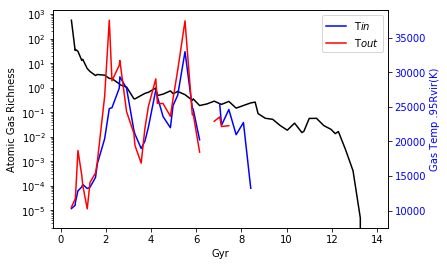

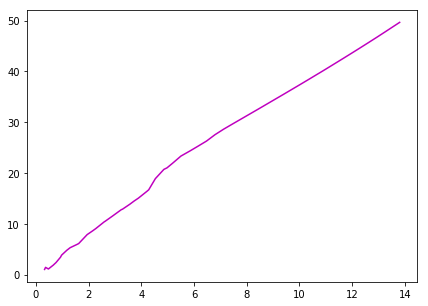

In [12]:
i = 22
print("Halo 22")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 23


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

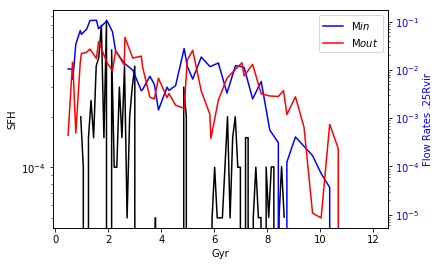

<Figure size 504x360 with 0 Axes>

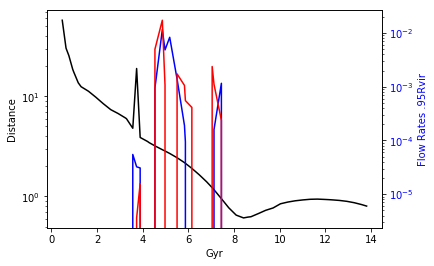

<Figure size 504x360 with 0 Axes>

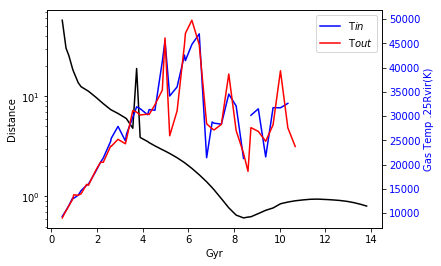

<Figure size 504x360 with 0 Axes>

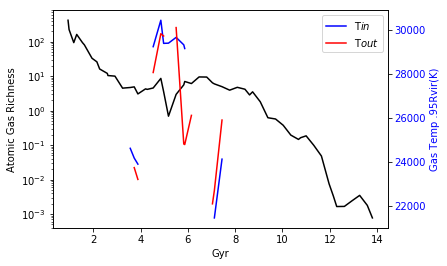

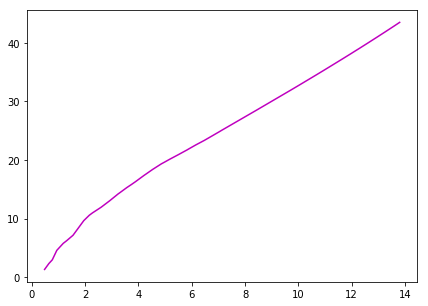

In [13]:
i = 23
print("Halo 23")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 27


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

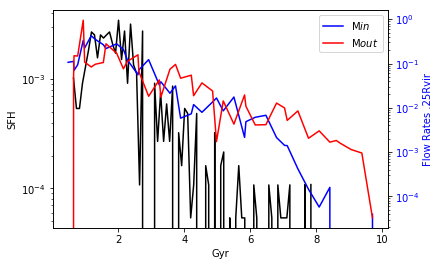

<Figure size 504x360 with 0 Axes>

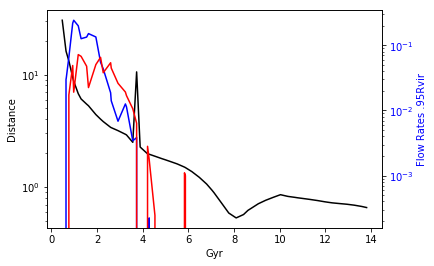

<Figure size 504x360 with 0 Axes>

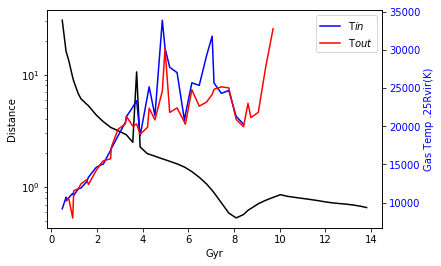

<Figure size 504x360 with 0 Axes>

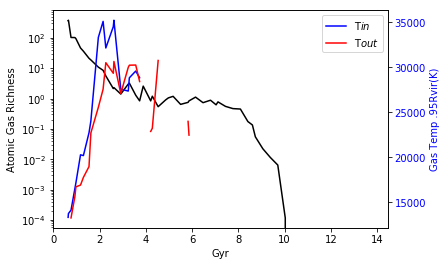

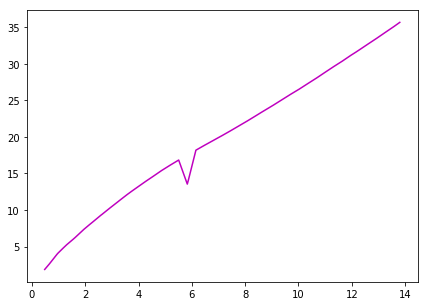

In [14]:
i = 27
print("Halo 27")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 52


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

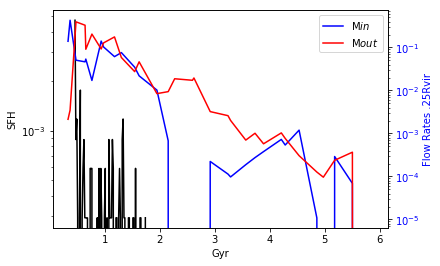

<Figure size 504x360 with 0 Axes>

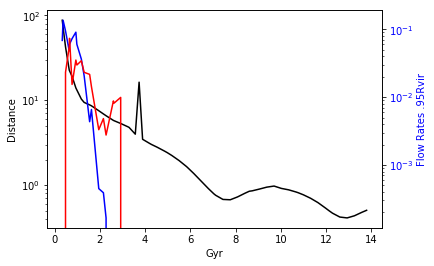

<Figure size 504x360 with 0 Axes>

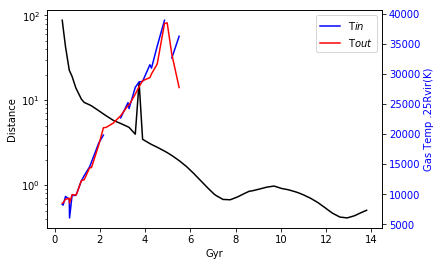

<Figure size 504x360 with 0 Axes>

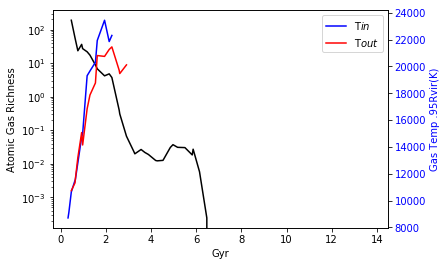

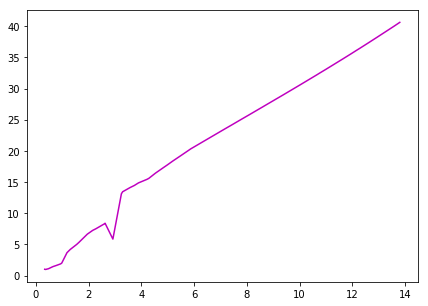

In [17]:
i = 52
print("Halo 52")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 53


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

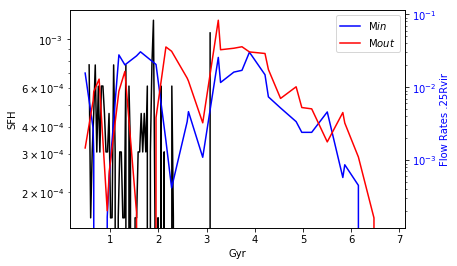

<Figure size 504x360 with 0 Axes>

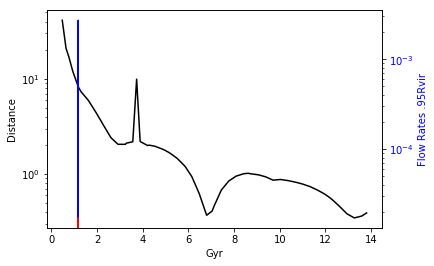

<Figure size 504x360 with 0 Axes>

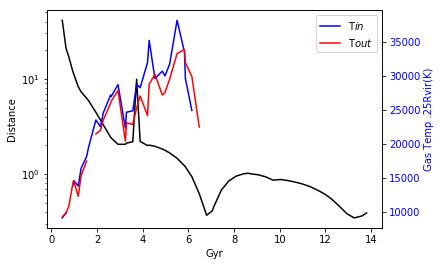

<Figure size 504x360 with 0 Axes>

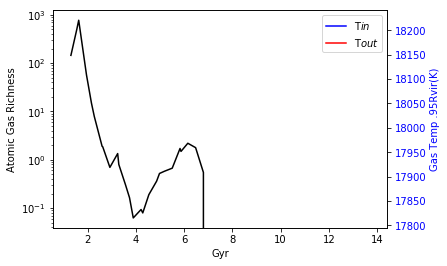

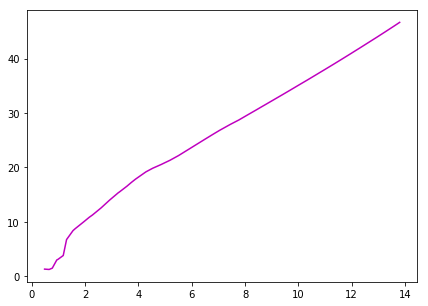

In [18]:
i = 53
print("Halo 53")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 55


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

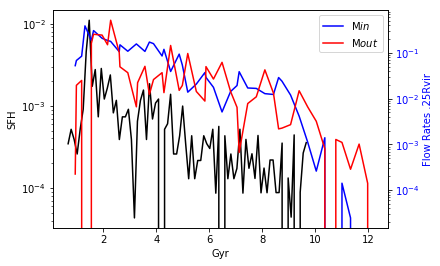

<Figure size 504x360 with 0 Axes>

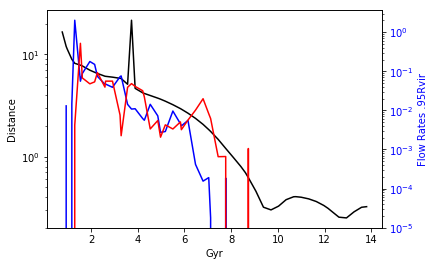

<Figure size 504x360 with 0 Axes>

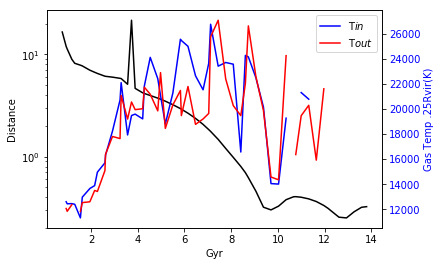

<Figure size 504x360 with 0 Axes>

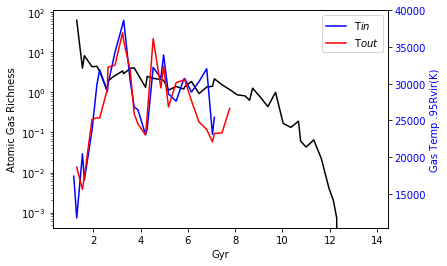

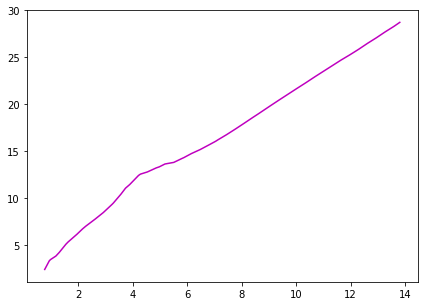

In [19]:
i = 55
print("Halo 55")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 73


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

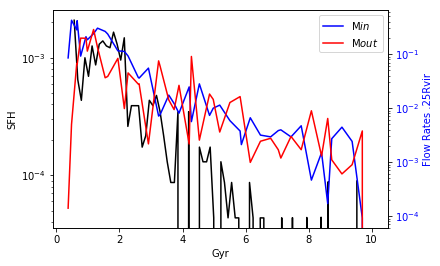

<Figure size 504x360 with 0 Axes>

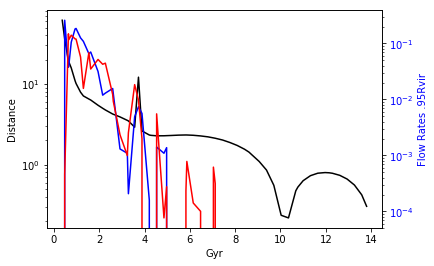

<Figure size 504x360 with 0 Axes>

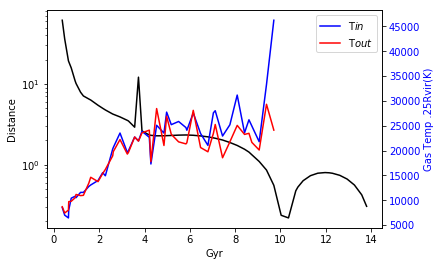

<Figure size 504x360 with 0 Axes>

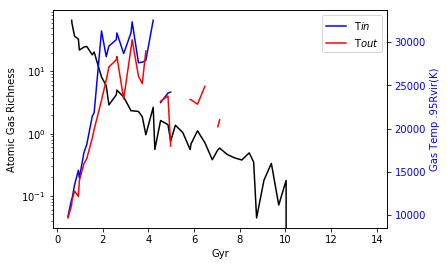

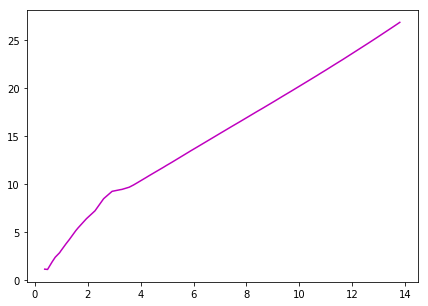

In [23]:
i = 73
print("Halo 73")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 113


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

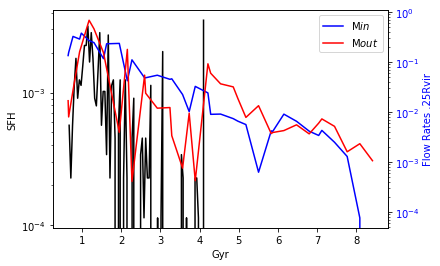

<Figure size 504x360 with 0 Axes>

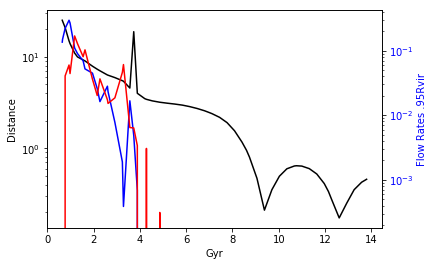

<Figure size 504x360 with 0 Axes>

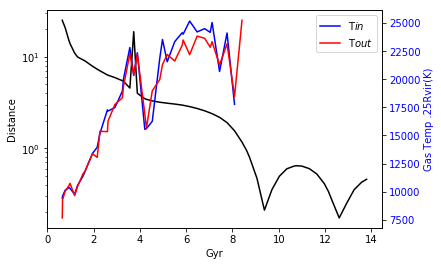

<Figure size 504x360 with 0 Axes>

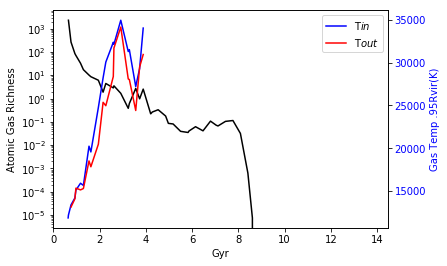

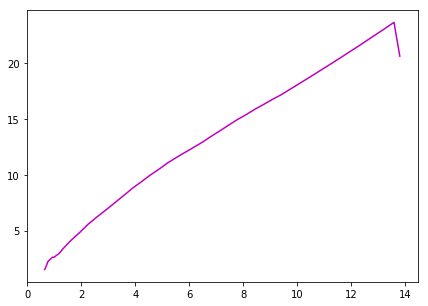

In [25]:
i = 113
print("Halo 113")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

Halo 212


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

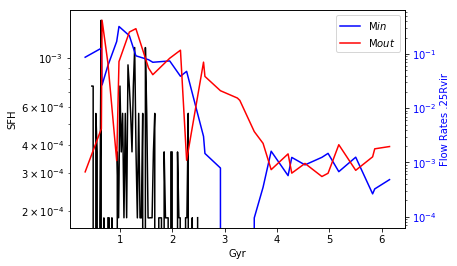

<Figure size 504x360 with 0 Axes>

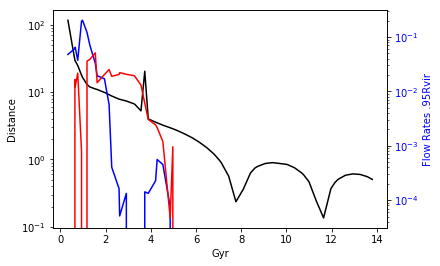

<Figure size 504x360 with 0 Axes>

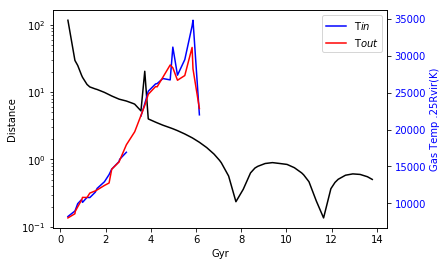

<Figure size 504x360 with 0 Axes>

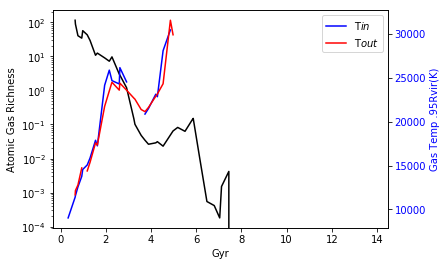

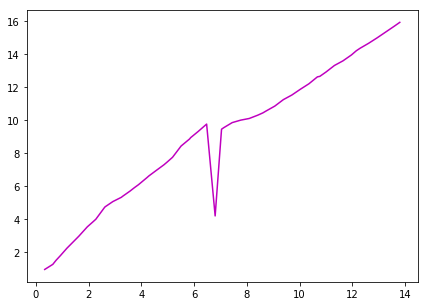

In [27]:
i = 212
print("Halo 212")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_23'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_23'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_91'][datat2['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_91'][datat2['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['h1dist'][datat2['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_23'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_23'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat2['time'][datat2['z0haloid']==i], datat2['mHI'][datat2['z0haloid']==i]/datat2['mstar'][datat2['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat2['time'][datat2['z0haloid']==i], abs(datat2['inflow_temp_91'][datat2['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat2['time'][datat2['z0haloid']==i], datat2['outflow_temp_91'][datat2['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat2['time'][datat2['z0haloid']==i], datat2['Rvir'][datat2['z0haloid']==i], c='m')
plt.show()

# H242

In [28]:
def cumulative_sfh(halo_num):
    age = 13.800797497330507
    s = pynbody.load('/home/christenc/Data/Sims/h242.cosmo50PLK.3072g/h242.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
    halo = s.halos()[halo_num]
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=80)
        plt.clf()
    except ValueError:
        print('Cannot create SFH, only {len(halo.s)} star particles')
        raise
        
    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar 
    return sfh, bincenters

In [29]:
datat3['z0haloid']

0       10.0
1       12.0
2       24.0
3       30.0
4       34.0
5       40.0
6       41.0
7       44.0
8       48.0
9       49.0
10      71.0
11      78.0
12      80.0
13      86.0
14     165.0
15     223.0
16     439.0
17      10.0
18      12.0
19      24.0
20      30.0
21      34.0
22      40.0
23      41.0
24      44.0
25      48.0
26      49.0
27      71.0
28      78.0
29      80.0
       ...  
955     30.0
956     40.0
957     41.0
958     44.0
959     48.0
960     49.0
961     71.0
962     80.0
963     86.0
964    165.0
965    223.0
966    439.0
967     10.0
968     12.0
969     24.0
970     30.0
971     40.0
972     44.0
973     48.0
974     71.0
975     10.0
976     12.0
977     24.0
978     30.0
979     40.0
980     44.0
981     10.0
982     12.0
983     24.0
984     30.0
Name: z0haloid, Length: 985, dtype: float64

Halo 10


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

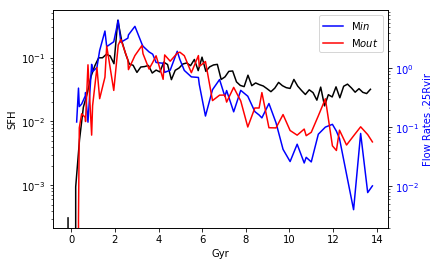

<Figure size 504x360 with 0 Axes>

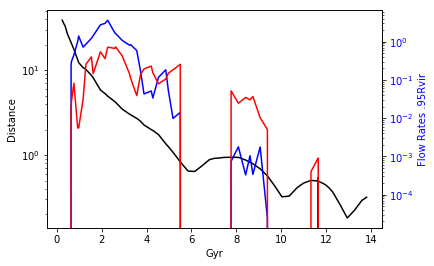

<Figure size 504x360 with 0 Axes>

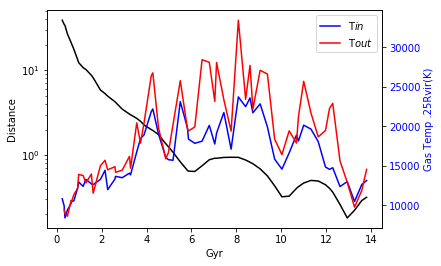

<Figure size 504x360 with 0 Axes>

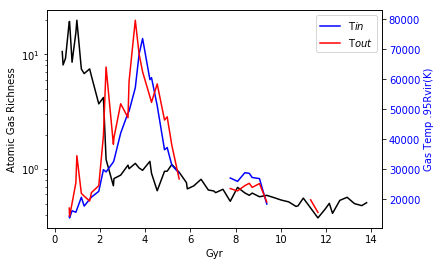

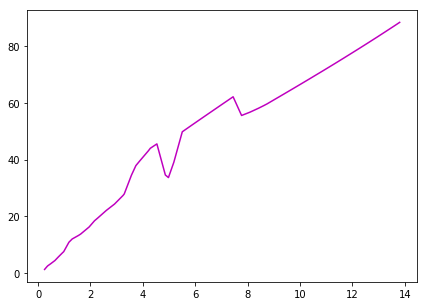

In [30]:
i = 10
print("Halo 10")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 12


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

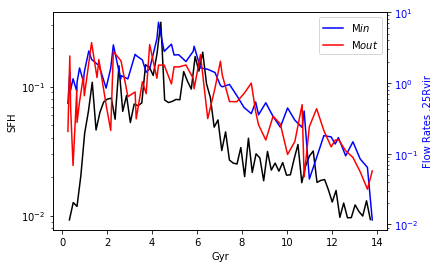

<Figure size 504x360 with 0 Axes>

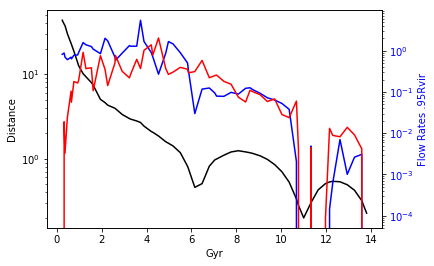

<Figure size 504x360 with 0 Axes>

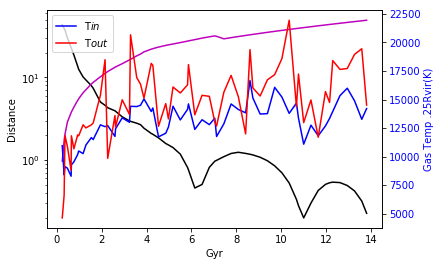

<Figure size 504x360 with 0 Axes>

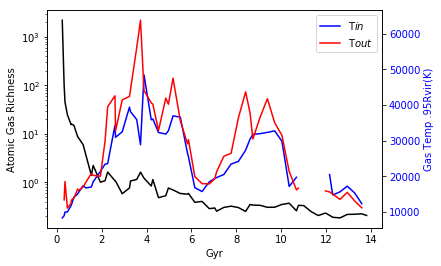

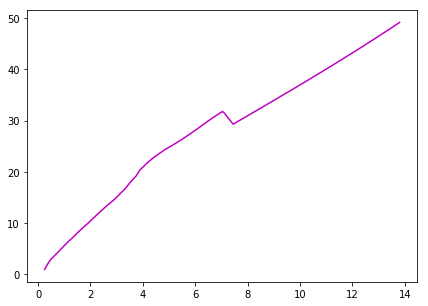

In [31]:
i = 12
print("Halo 12")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 24


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

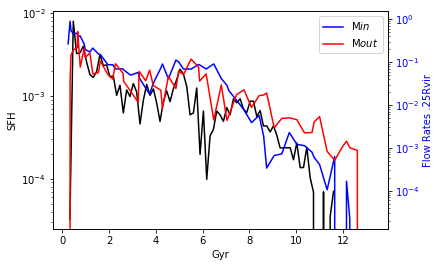

<Figure size 504x360 with 0 Axes>

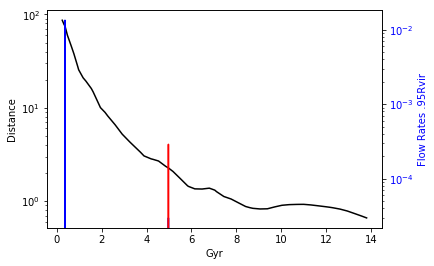

<Figure size 504x360 with 0 Axes>

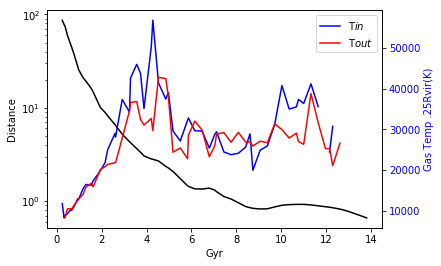

<Figure size 504x360 with 0 Axes>

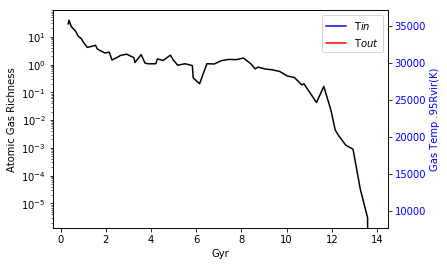

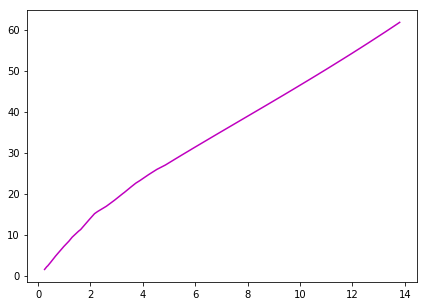

In [32]:
i = 24
print("Halo 24")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 30


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

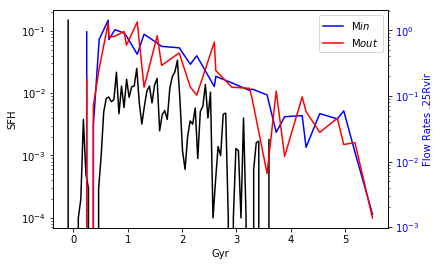

<Figure size 504x360 with 0 Axes>

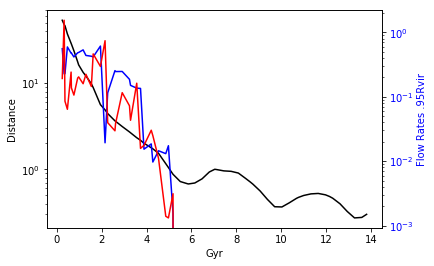

<Figure size 504x360 with 0 Axes>

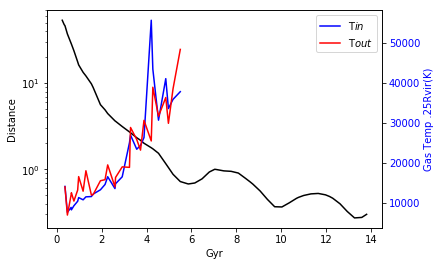

<Figure size 504x360 with 0 Axes>

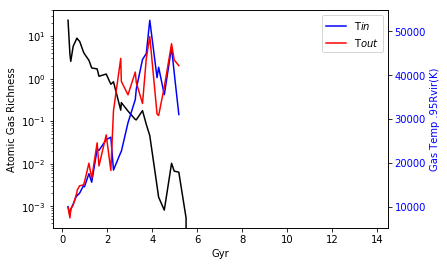

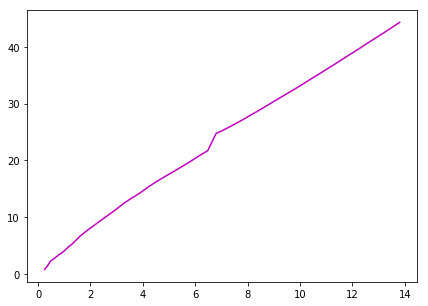

In [33]:
i = 30
print("Halo 30")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 40


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

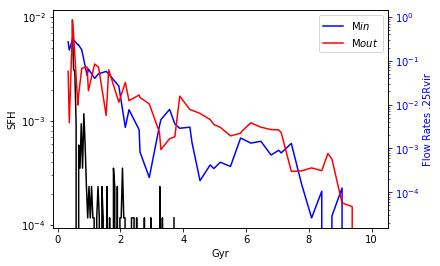

<Figure size 504x360 with 0 Axes>

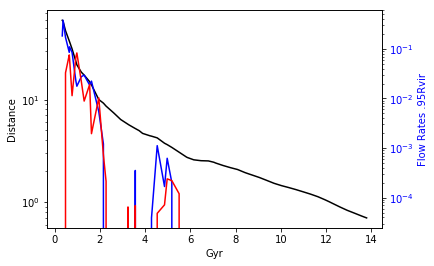

<Figure size 504x360 with 0 Axes>

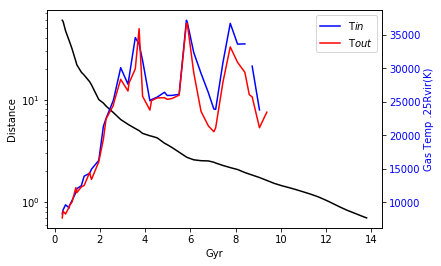

<Figure size 504x360 with 0 Axes>

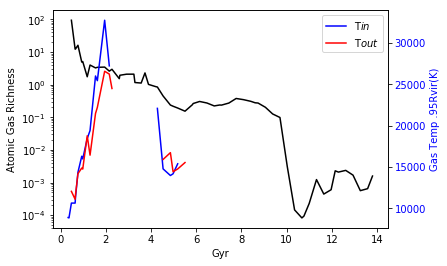

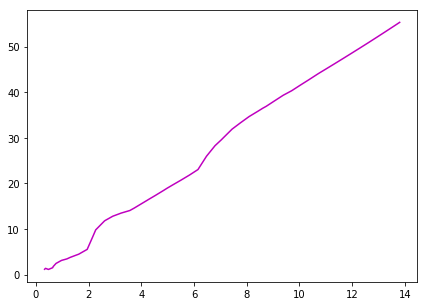

In [35]:
i = 40
print("Halo 40")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 41


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

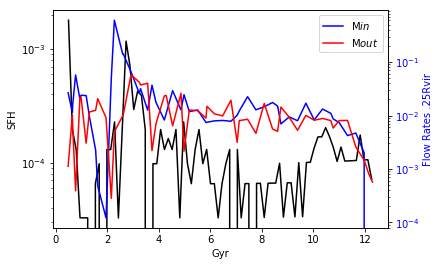

<Figure size 504x360 with 0 Axes>

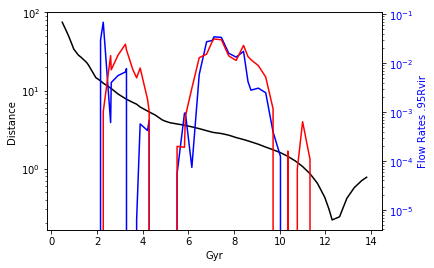

<Figure size 504x360 with 0 Axes>

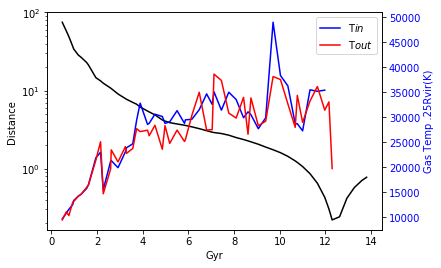

<Figure size 504x360 with 0 Axes>

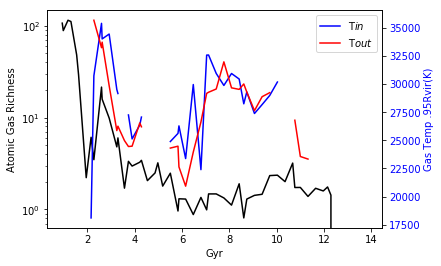

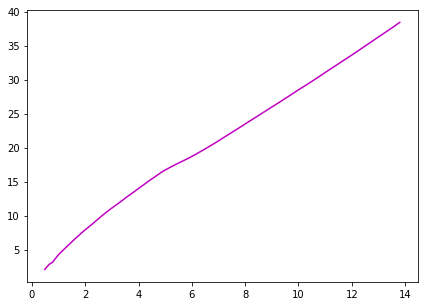

In [36]:
i = 41
print("Halo 41")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 44


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

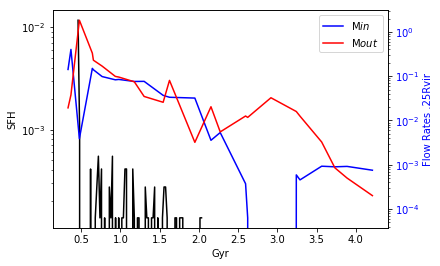

<Figure size 504x360 with 0 Axes>

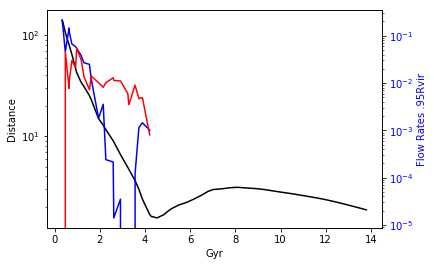

<Figure size 504x360 with 0 Axes>

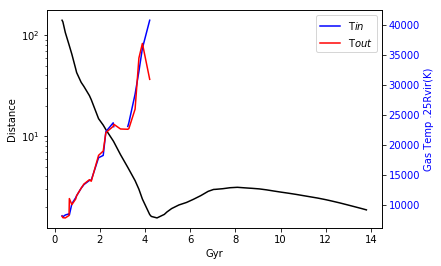

<Figure size 504x360 with 0 Axes>

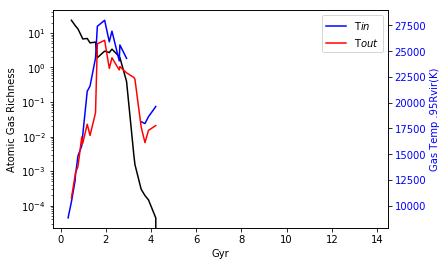

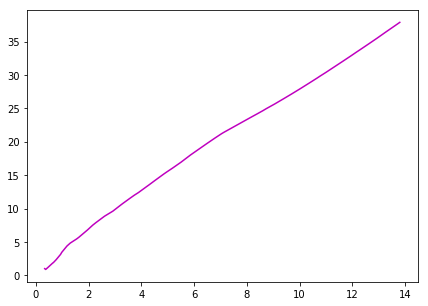

In [37]:
i = 44
print("Halo 44")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 48


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

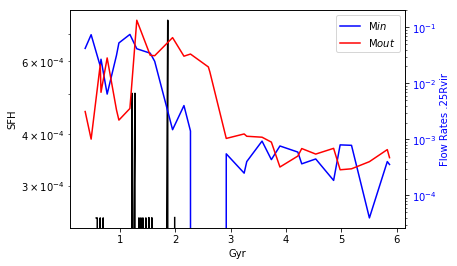

<Figure size 504x360 with 0 Axes>

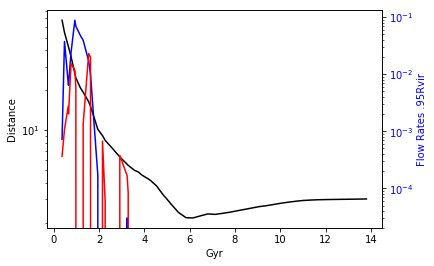

<Figure size 504x360 with 0 Axes>

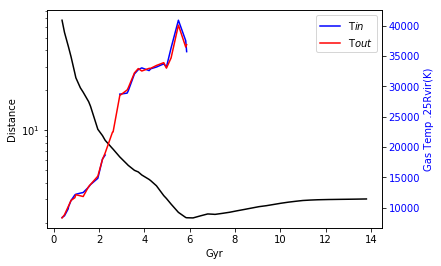

<Figure size 504x360 with 0 Axes>

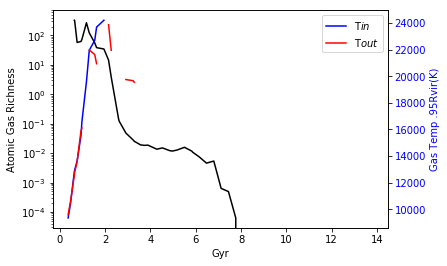

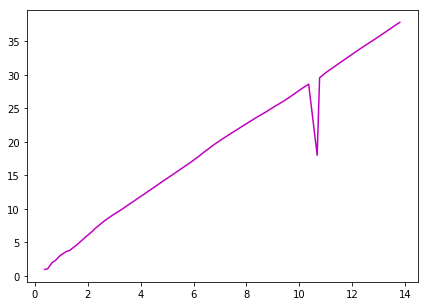

In [38]:
i = 48
print("Halo 48")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 71


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

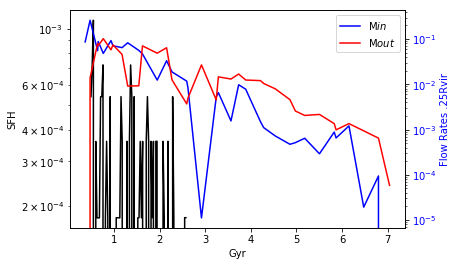

<Figure size 504x360 with 0 Axes>

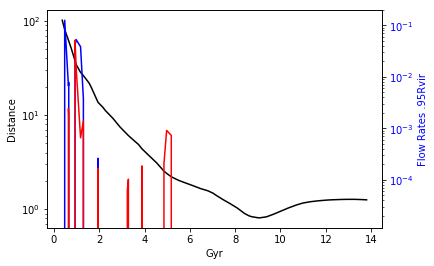

<Figure size 504x360 with 0 Axes>

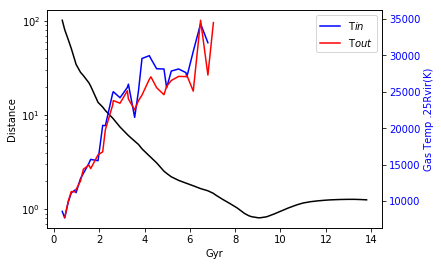

<Figure size 504x360 with 0 Axes>

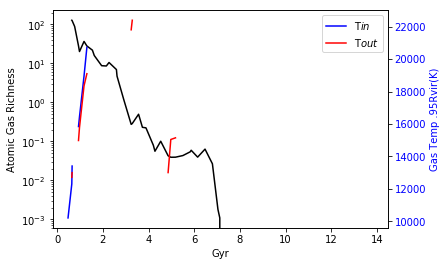

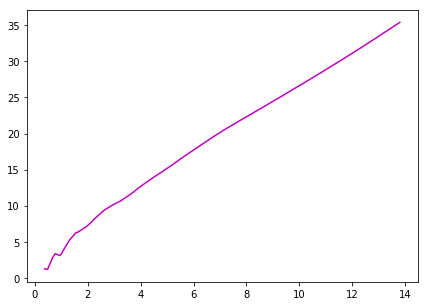

In [40]:
i = 71
print("Halo 71")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 78


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

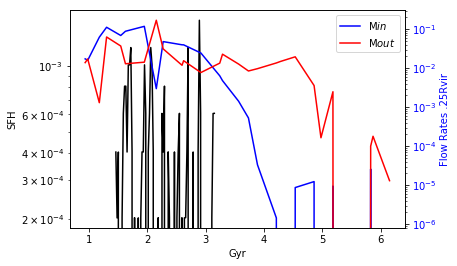

<Figure size 504x360 with 0 Axes>

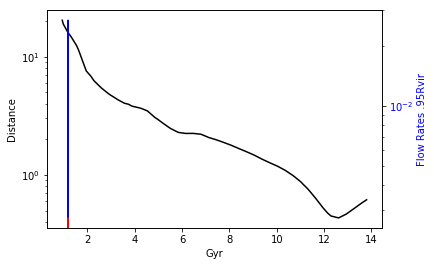

<Figure size 504x360 with 0 Axes>

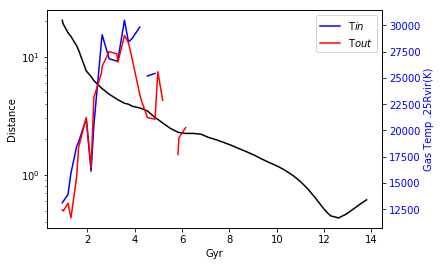

<Figure size 504x360 with 0 Axes>

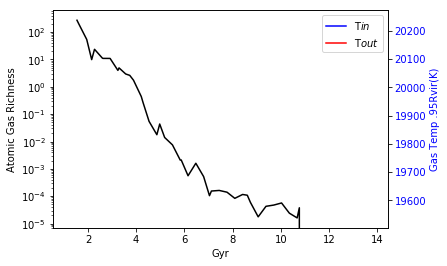

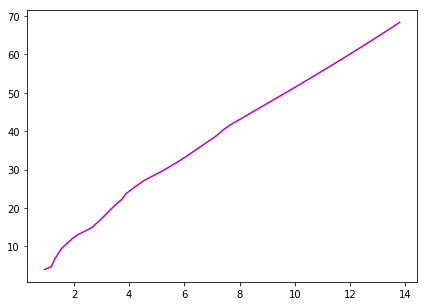

In [41]:
i = 78
print("Halo 78")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 80


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

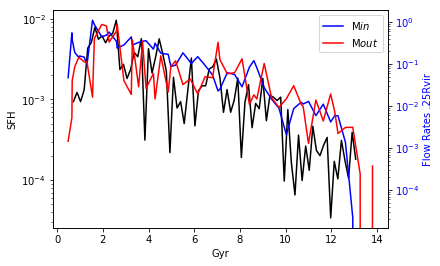

<Figure size 504x360 with 0 Axes>

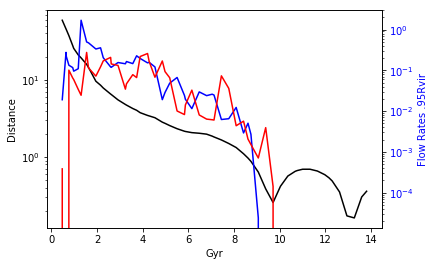

<Figure size 504x360 with 0 Axes>

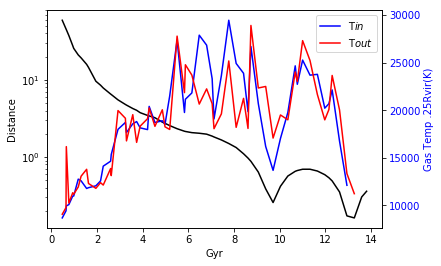

<Figure size 504x360 with 0 Axes>

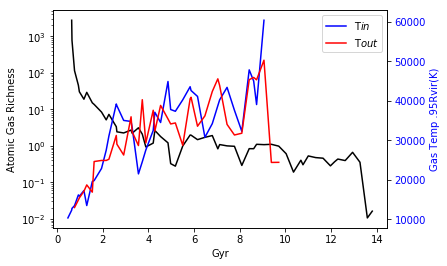

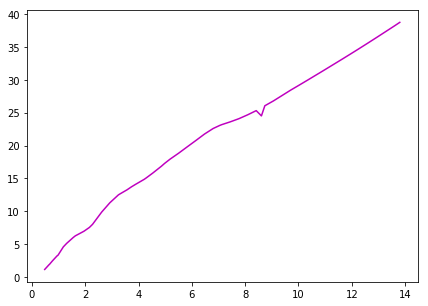

In [42]:
i = 80
print("Halo 80")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 86


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

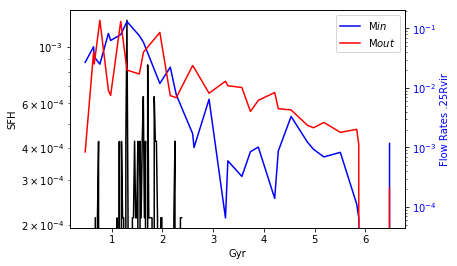

<Figure size 504x360 with 0 Axes>

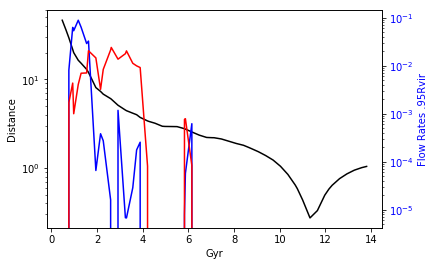

<Figure size 504x360 with 0 Axes>

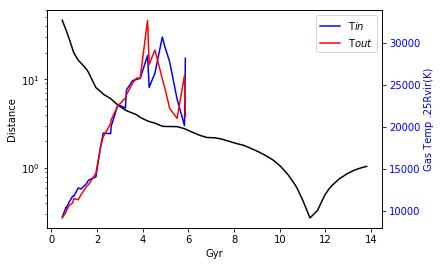

<Figure size 504x360 with 0 Axes>

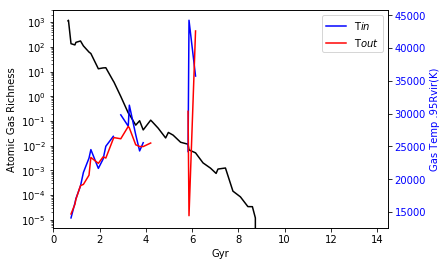

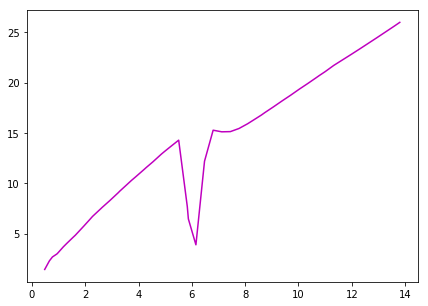

In [43]:
i = 86
print("Halo 86")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 223


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

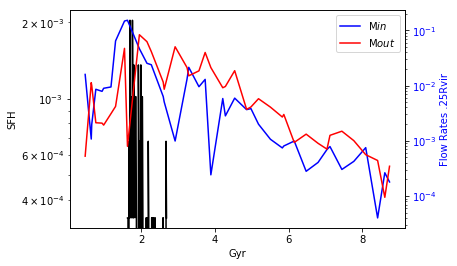

<Figure size 504x360 with 0 Axes>

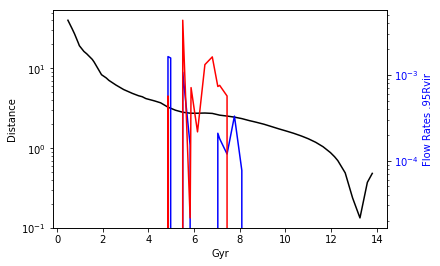

<Figure size 504x360 with 0 Axes>

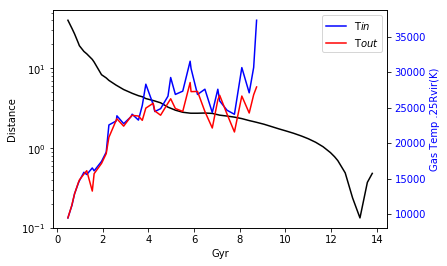

<Figure size 504x360 with 0 Axes>

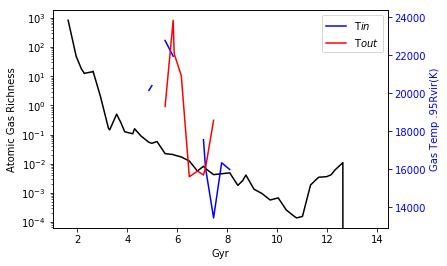

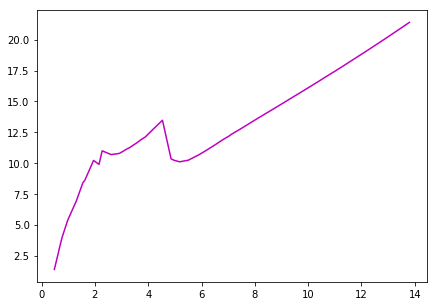

In [45]:
i = 223
print("Halo 223")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

Halo 439


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

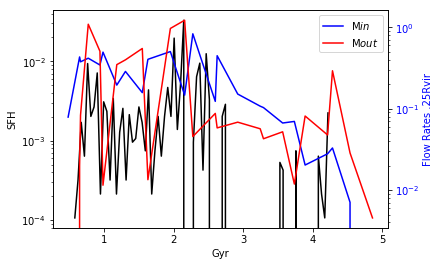

<Figure size 504x360 with 0 Axes>

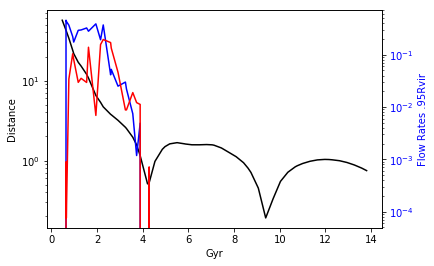

<Figure size 504x360 with 0 Axes>

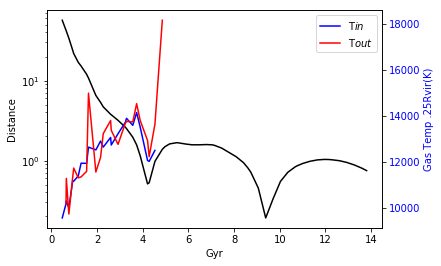

<Figure size 504x360 with 0 Axes>

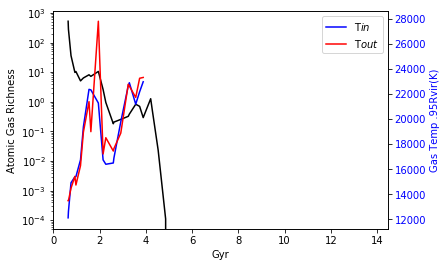

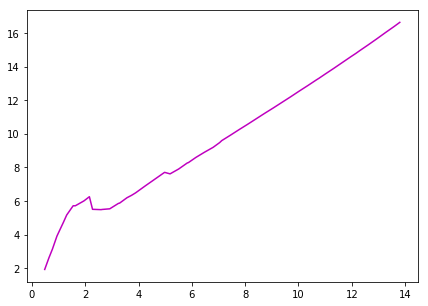

In [46]:
i = 439
print("Halo 439")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_23'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_23'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_91'][datat3['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_91'][datat3['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['h1dist'][datat3['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_23'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_23'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat3['time'][datat3['z0haloid']==i], datat3['mHI'][datat3['z0haloid']==i]/datat3['mstar'][datat3['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat3['time'][datat3['z0haloid']==i], abs(datat3['inflow_temp_91'][datat3['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat3['time'][datat3['z0haloid']==i], datat3['outflow_temp_91'][datat3['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat3['time'][datat3['z0haloid']==i], datat3['Rvir'][datat3['z0haloid']==i], c='m')
plt.show()

# H329

In [48]:
def cumulative_sfh(halo_num):
    age = 13.800797497330507
    s = pynbody.load('/home/christenc/Data/Sims/h329.cosmo50PLK.3072g/h329.cosmo50PLK.3072gst5HbwK1BH/snapshots_200bkgdens/h329.cosmo50PLK.3072gst5HbwK1BH.004096')
    halo = s.halos()[halo_num]
    try:
        sfh, bins = pynbody.plot.stars.sfh(halo, filename=None, massform=False, clear=False, legend=False, subplot=False, trange=False, bins=80)
        plt.clf()
    except ValueError:
        print('Cannot create SFH, only {len(halo.s)} star particles')
        raise
        
    sfhmstar = np.sum(sfh)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    c_sfh = np.empty(shape=sfh.shape)
    for i in range(len(bincenters)):
        c_sfh[i] = np.sum(sfh[:i+1])/sfhmstar 
    return sfh, bincenters

In [8]:
datat4['z0haloid']

0       11.0
1       31.0
2       33.0
3       40.0
4       64.0
5      103.0
6      133.0
7      137.0
8      146.0
9      185.0
10      11.0
11      31.0
12      33.0
13      40.0
14      64.0
15     103.0
16     133.0
17     137.0
18     146.0
19     185.0
20      11.0
21      31.0
22      33.0
23      40.0
24      64.0
25     103.0
26     133.0
27     137.0
28     146.0
29     185.0
       ...  
515     11.0
516     31.0
517     33.0
518     40.0
519     64.0
520    103.0
521    137.0
522    146.0
523     11.0
524     31.0
525     33.0
526     40.0
527     64.0
528    103.0
529    137.0
530    146.0
531     11.0
532     31.0
533     40.0
534     64.0
535    103.0
536    137.0
537    146.0
538     64.0
539    137.0
540    146.0
541    185.0
542    137.0
543    146.0
544    185.0
Name: z0haloid, Length: 545, dtype: float64

Halo 11


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

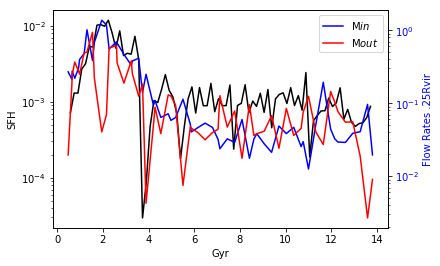

<Figure size 504x360 with 0 Axes>

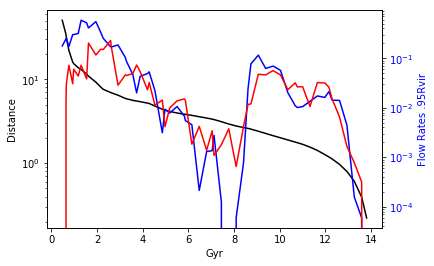

<Figure size 504x360 with 0 Axes>

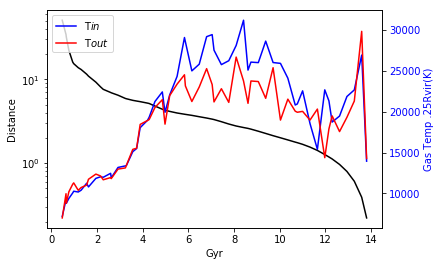

<Figure size 504x360 with 0 Axes>

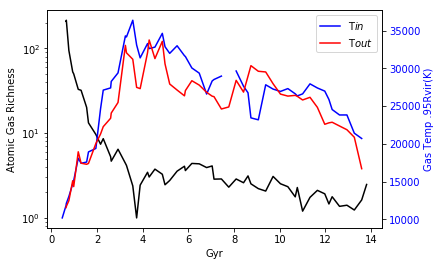

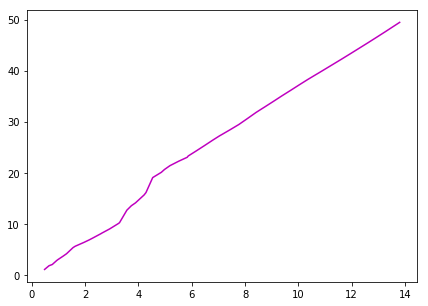

In [49]:
i = 11
print("Halo 11")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_23'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_23'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_91'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_91'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_23'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_23'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['mHI'][datat4['z0haloid']==i]/datat4['mstar'][datat4['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_91'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_91'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat4['time'][datat4['z0haloid']==i], datat4['Rvir'][datat4['z0haloid']==i], c='m')
plt.show()

Halo 31


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

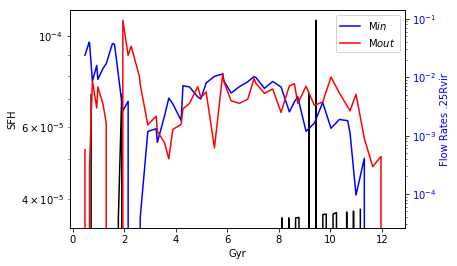

<Figure size 504x360 with 0 Axes>

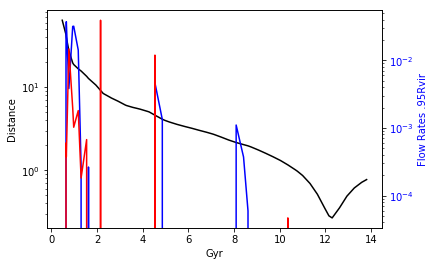

<Figure size 504x360 with 0 Axes>

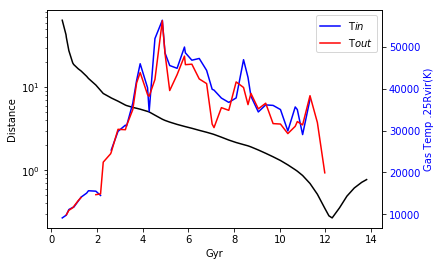

<Figure size 504x360 with 0 Axes>

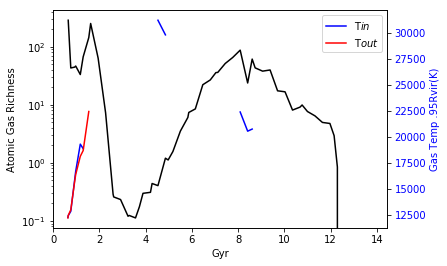

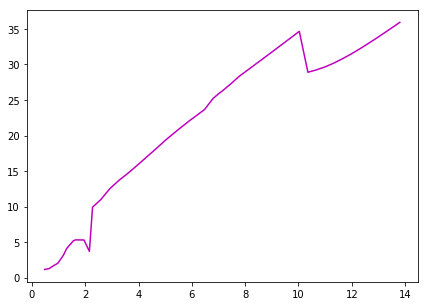

In [84]:
i = 31
print("Halo 31")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_23'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_23'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_91'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_91'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_23'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_23'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['mHI'][datat4['z0haloid']==i]/datat4['mstar'][datat4['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_91'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_91'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat4['time'][datat4['z0haloid']==i], datat4['Rvir'][datat4['z0haloid']==i], c='m')
plt.show()

Halo 33


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

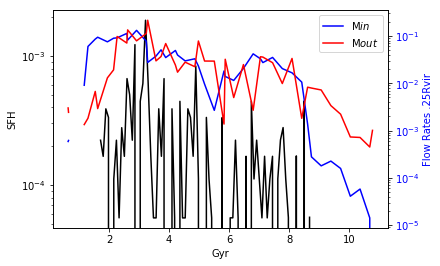

<Figure size 504x360 with 0 Axes>

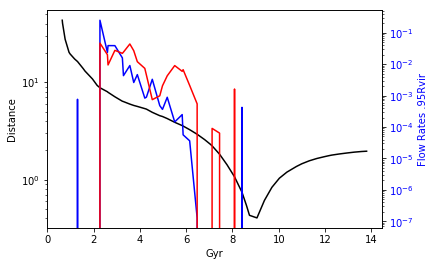

<Figure size 504x360 with 0 Axes>

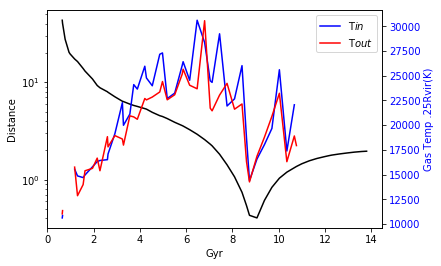

<Figure size 504x360 with 0 Axes>

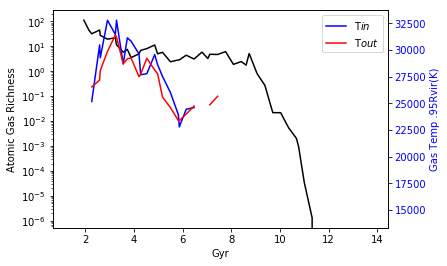

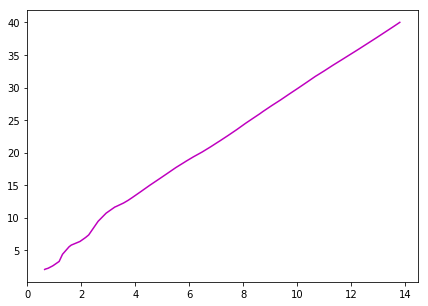

In [83]:
i = 33
print("Halo 33")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_23'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_23'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_91'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_91'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_23'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_23'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['mHI'][datat4['z0haloid']==i]/datat4['mstar'][datat4['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_91'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_91'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat4['time'][datat4['z0haloid']==i], datat4['Rvir'][datat4['z0haloid']==i], c='m')
plt.show()

Halo 40


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

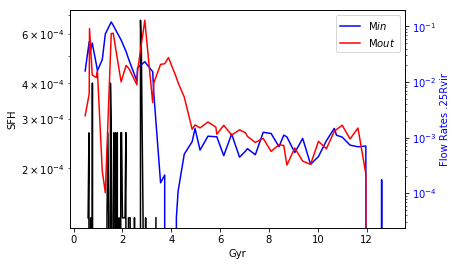

<Figure size 504x360 with 0 Axes>

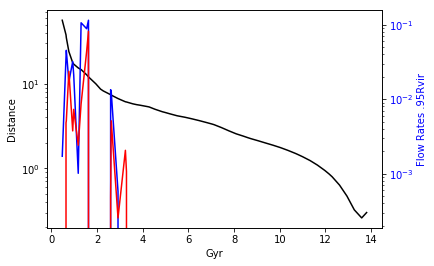

<Figure size 504x360 with 0 Axes>

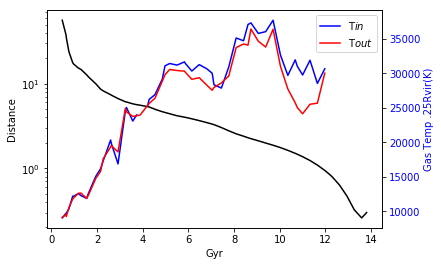

<Figure size 504x360 with 0 Axes>

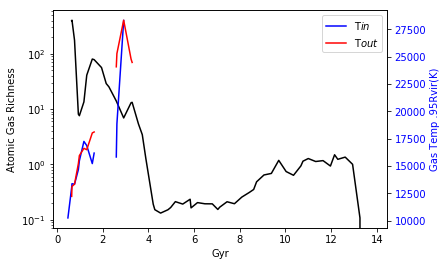

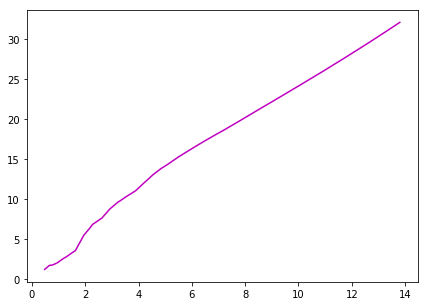

In [82]:
i = 40
print("Halo 40")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_23'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_23'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_91'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_91'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_23'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_23'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['mHI'][datat4['z0haloid']==i]/datat4['mstar'][datat4['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_91'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_91'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat4['time'][datat4['z0haloid']==i], datat4['Rvir'][datat4['z0haloid']==i], c='m')
plt.show()

Halo 143


/home/engelhar/.local/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

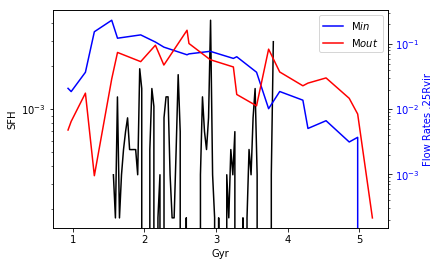

<Figure size 504x360 with 0 Axes>

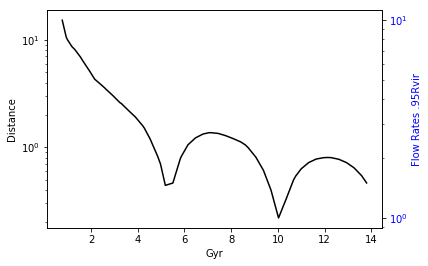

<Figure size 504x360 with 0 Axes>

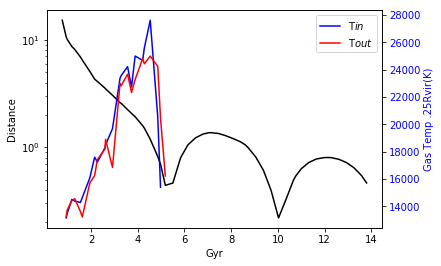

<Figure size 504x360 with 0 Axes>

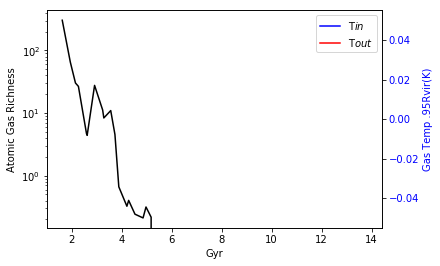

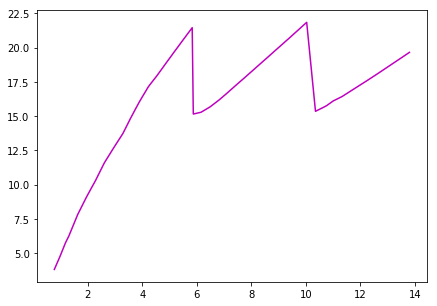

In [58]:
i = 133
print("Halo 143")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_23'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_23'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_91'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_91'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_23'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_23'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['mHI'][datat4['z0haloid']==i]/datat4['mstar'][datat4['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_91'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_91'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat4['time'][datat4['z0haloid']==i], datat4['Rvir'][datat4['z0haloid']==i], c='m')
plt.show()

Halo 137


<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

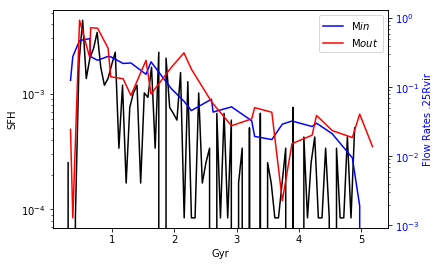

<Figure size 504x360 with 0 Axes>

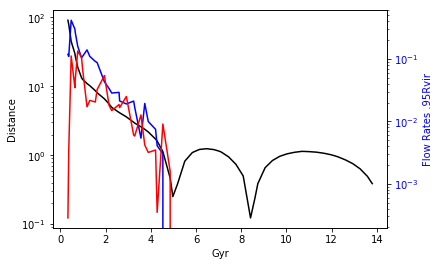

<Figure size 504x360 with 0 Axes>

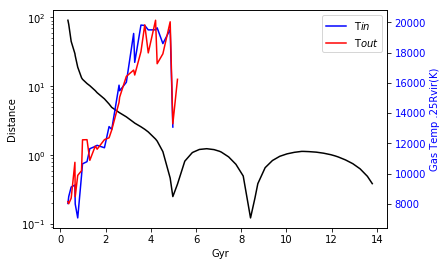

<Figure size 504x360 with 0 Axes>

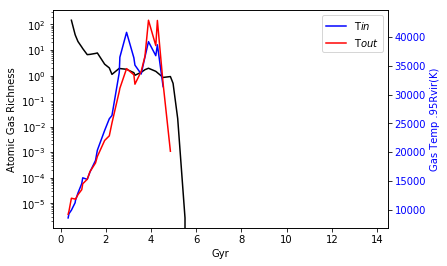

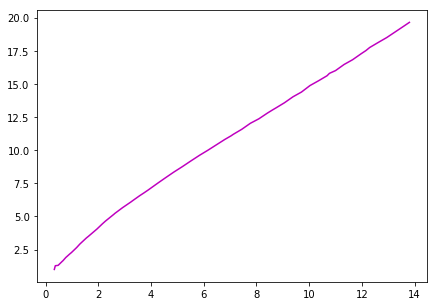

In [59]:
i = 137
print("Halo 137")

sfh, time = cumulative_sfh(i)

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('SFH', color='black')
ax1.plot(time, sfh, c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .25Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_23'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_23'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Flow Rates .95Rvir', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_91'][datat4['z0haloid']==i]), c='blue', label=r'M${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_91'][datat4['z0haloid']==i], c='red', label=r'M${out}$')
ax2.semilogy()
ax2.tick_params(axis='y', labelcolor='b')

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Distance', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['h1dist'][datat4['z0haloid']==i], c='black')
ax1.semilogy()
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .25Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_23'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_23'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()

plt.figure(figsize=(7,5))
fig, ax1 = plt.subplots()
ax1.set_xlabel('Gyr')
ax1.set_ylabel('Atomic Gas Richness', color='black')
ax1.plot(datat4['time'][datat4['z0haloid']==i], datat4['mHI'][datat4['z0haloid']==i]/datat4['mstar'][datat4['z0haloid']==i], c='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Gas Temp .95Rvir(K)', color='b')  # we already handled the x-label with ax1
ax2.plot(datat4['time'][datat4['z0haloid']==i], abs(datat4['inflow_temp_91'][datat4['z0haloid']==i]), c='blue', label=r'T${in}$')
ax2.plot(datat4['time'][datat4['z0haloid']==i], datat4['outflow_temp_91'][datat4['z0haloid']==i], c='red', label=r'T${out}$')
ax2.tick_params(axis='y', labelcolor='b')
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
plt.plot(datat4['time'][datat4['z0haloid']==i], datat4['Rvir'][datat4['z0haloid']==i], c='m')
plt.show()